Name: Bharat Suthar

Batch: November

Domain: Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df= pd.read_csv('D:\CodeSoft projects\Movie rating prediction with python\IMDb Movies.csv',encoding='iso-8859-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Data PreProcessing

* Handling missing values in Dataset

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [28]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

### Removing Duplicates from the Datasets

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


### Data Visualization

* Rating Distribution 

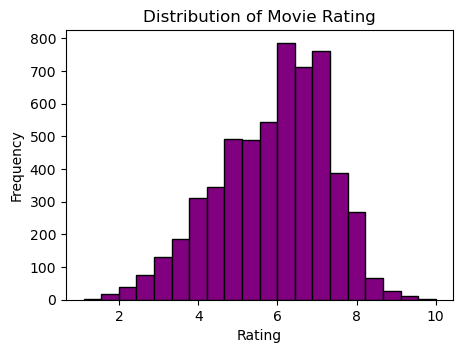

In [11]:
plt.figure(figsize=(5,3.5))
plt.hist(df['Rating'],bins= 20 , color= "purple", edgecolor= 'black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Rating')
plt.show()

### Count Movies Each Year

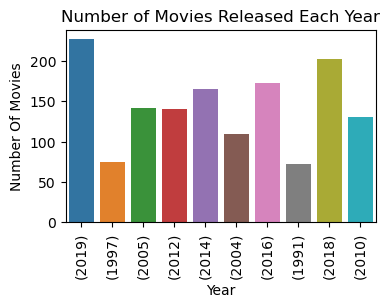

In [83]:
years_10 = df['Year'].unique()[:10]

# filter the Dataframe to include only data for these years
filtered_data = df[df['Year'].isin(years_10)]

# Create the Countplot with the filter data
plt.figure(figsize=(4,2.5))
sns.countplot(data=filtered_data, x= 'Year')
plt.xlabel('Year')
plt.ylabel('Number Of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()



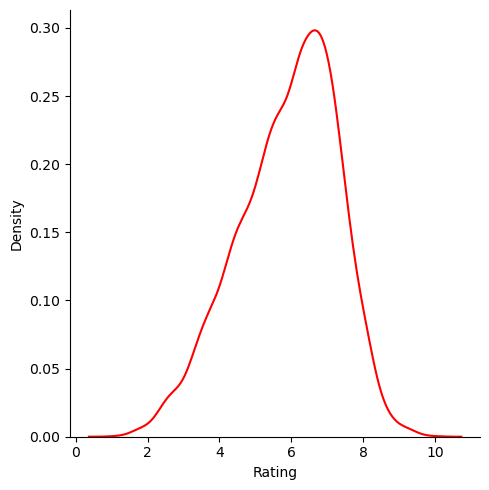

In [82]:
sns.displot(df["Rating"],kind='kde',color='red')
plt.show()

In [39]:
df.drop(['Duration'],axis=1,inplace=True)

In [40]:
df.columns

Index(['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [41]:
x = df[['Year', 'Genre','Director', 'Actor 1','Actor 2', 'Actor 3']]

In [42]:
y = df['Rating']

In [59]:
# Removing commas and convert 'Votes' column to float
df['Votes']= df['Votes'].replace(",","",regex=True).astype(float)


In [62]:
# select numaric columns
numaric_columns = df.select_dtypes(include=['float64','int64'])

# saperate  your feature (x) and target (y)
x = numaric_columns.drop('Rating',axis=1) #Exclude the Rating Column
y = df["Rating"]

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score


In [64]:
# Split the data into training  and testing sets
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
# Create and train a Linear reggresion model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
# make prediction on test set
y_prediction = model.predict(x_test)

In [72]:
# Evaluate the model
mse = mean_squared_error(y_test,y_prediction)
r2 = r2_score(y_test,y_prediction)

print("mean Squared Error:",mse)
print("R-squared:",r2)

mean Squared Error: 1.8069817836031192
R-squared: 0.024172818209248548
